In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

# Introduction to Jets

High-energy quarks and gluons, such as those produced in proton-proton collisions at the LHC, have a tendency to radiate low-energy partons collinearly with the original particle's direction of travel. This results in a conical "jet" of lower-energy quarks and gluons radiating from the collision vertex, which then recombine into a shower of hadrons before reaching the calorimeters. 

Individual quarks and gluons, whether constituents of the original protons or those produced directly in the collision energy, are often of little interest to us and form the so-called QCD background, but many heavy particles that _do_ interest us (such as the Higgs) ultimately decay into QCD partons. We would thus like a way to separate jets arising from these two scenarios. Thankfully, whereas the parton radiation discussed above is soft (i.e. the radiated particles are much lower energy than the original) and collinear, the decay products of a heavy particle like the Higgs are often divergent and of similar energy to one another. Due to relativistic effects, the divergence angles are typically still too low for the resultant jets to be resolved during jet reconstruction, but the combined jet will appear to have multiple cores or "prongs" which can sometimes be identified with more subtle jet substructure analysis. Some of these techniques are discussed below.

# The Dataset

In [2]:
with open("higgs_100000_pt_250_500.pkl", 'rb') as file:
    higgs_data = pickle.load(file)
    
with open("qcd_100000_pt_250_500.pkl", 'rb') as file:
    qcd_data = pickle.load(file)
    
higgs_data.insert(0, "dataset", "higgs")
qcd_data.insert(0, "dataset", "qcd")

data = pd.concat([higgs_data, qcd_data], ignore_index=True)

data

,dataset,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,higgs,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,higgs,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,higgs,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,higgs,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
4,higgs,486.141137,-1.917812,-2.221953,132.182504,0.103632,0.001438,1.291784,0.000398,0.722656,0.166851,0.148080,0.230886,0.887497,0.678118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,qcd,418.171225,1.804938,-1.555512,67.399102,0.047555,0.000669,6.216951,0.000335,0.794253,0.734325,0.533141,0.924548,0.726028,0.039376
199996,qcd,492.119236,-0.037258,0.037888,90.775772,0.095329,0.001090,1.258409,0.005327,0.849051,0.285315,0.177652,0.336041,0.622651,0.321335
199997,qcd,492.932552,-0.912632,0.578690,106.611253,0.078793,0.002331,4.764786,0.004449,0.951293,0.789768,0.620329,0.830205,0.785457,0.053165
199998,qcd,402.673975,-1.736921,-2.103913,66.278542,0.066585,0.000851,2.881152,0.000324,0.831466,0.488685,0.429960,0.587739,0.879831,0.212806


The data above comes from simulated LHC proton-proton collisions generated with Pythia. We are not working with raw calorimeter values; instead, each row of the dataframe represents a reconstructed jet along with 14 jet observables. Our dataset consists only of low $p_T$ jets, i.e. those with $p_T < 500$ GeV. Furthermore, each jet has been separated based on whether it resulted from a Higgs decay or a QCD background event.

In [3]:
sns.set_theme()
sns.set_style('white')

def plot_field(field, log=False):
    sns.displot(data, x=field, col='dataset', bins=100, height=5, linewidth=0, log_scale=(False, log))

## Coordinate system

The most basic property of a jet is the location of its center relative to the collision vertex. This is measured by `eta` ($\eta$) and `phi` ($\phi$). $\phi$ is the angle in radians from $-\pi$ to $\pi$ around the beam line, while $\eta$ is defined as
$$\eta = -\log \left[ \tan\left(\frac{\theta}{2}\right) \right]$$
where $\theta$ is the angle _off of_ the beam line. Thus, $\eta = 0$ corresponds to a point on the detector immediately around the collision vertex (perpendicular to the beam line), while a very positive or negative value corresponds to a point further down the barrel.

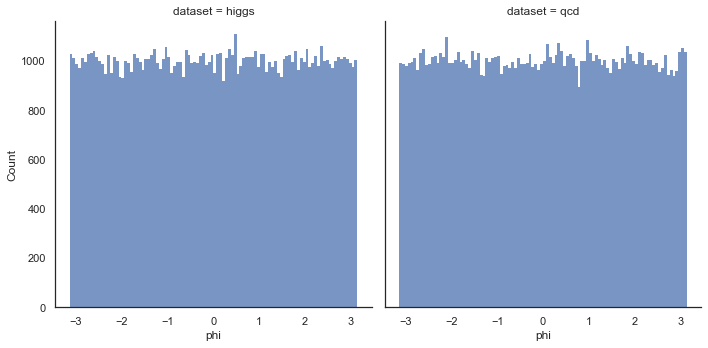

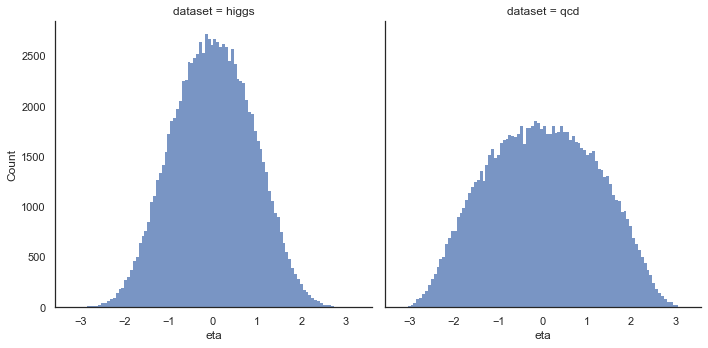

In [4]:
plot_field('phi')
plot_field('eta')

## Jet radius

The jet finding algorithm used to generate this data exploits the fact that jets appear on the calorimeter as roughly circular regions when plotted in $\eta, \phi$ space. `KtDeltaR` ($\Delta R$) is the radius of this region, and is thus a measure of the divergence of the jet. 

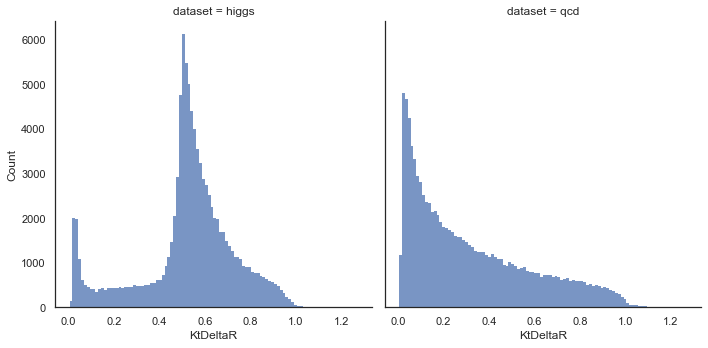

In [5]:
plot_field('KtDeltaR')

## Kinematic observables

`pt` ($p_T$) and `mass` are the total tranverse momentum and energy in GeV, respectively, of all the particles in the jet. By conservation, they should also be similar to the transverse momentum and energy of the particle that originally produced the jet.

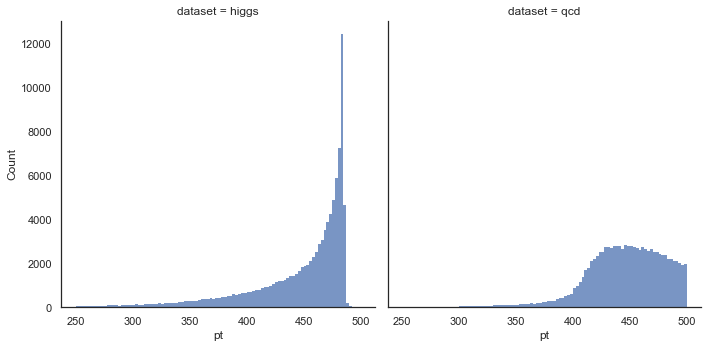

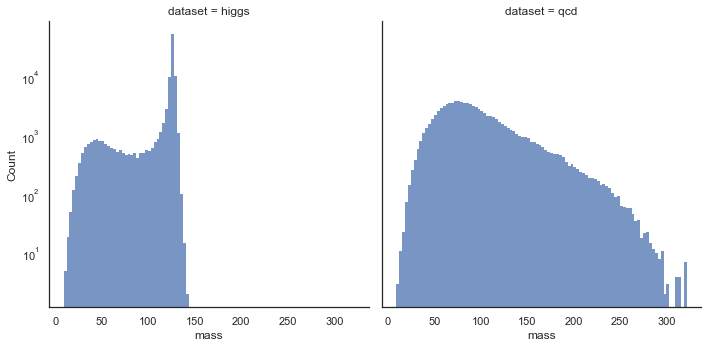

In [6]:
plot_field('pt')
plot_field('mass', log=True)

## Substructure Observables

The remaining observables are all related to jet substructure, meaning they're useful for identifying subjets as discussed before. Before defining these observables, we need to introduce some notation. For any jet, $J$ will denote the set of all particles in the jet, and for each $i \in J$, $p_T^i$ will be the transverse momentum of the particle while $\Delta R^i$ will be the distance in $\eta, \phi$ space from the particle to the center of the jet. Furthermore, given two particles $i,j \in J$, $\Delta R^{i,j}$ will be the distance between $i$ and $j$. $p_T$ and $\Delta R$ with no subscript represent the total transverse momentum and radius of the jet, as before.

### Angularity

The `angularity` ($\alpha$) is defined as
$$\alpha = \frac{1}{p_T} \sum_{i \in J} p_T^i (\Delta R^i)^2$$
High angularity implies a large amount of transverse momentum is located far from the center of the jet, which suggests that the jet may be multi-pronged.

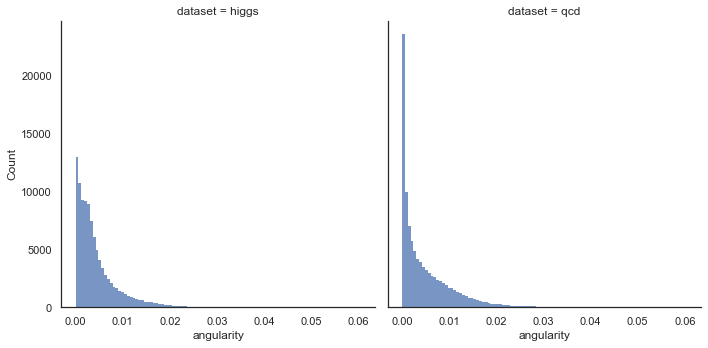

In [7]:
plot_field('angularity')

### Subjettiness

If you suspect a jet has a certain number of subjets, then there are algorithms that attempt to identify the best fit for the centers of these subjets. We would then like to know how good a fit this $N$-subjet decomposition is, which we can do with subjettiness. Supposing you have identified $N$ candidate jets, then given $i \in J$ and $k \in \{1, \dots, N\}$, let $\Delta R_k^i$ be the distance from the particle $i$ to the $k$th candidate subjet center. We then define $N$-subjettiness as
$$\tau_N = \frac{1}{p_T} \sum_{i \in J} p_T^i \min\{\Delta R_1^i, \dots, \Delta R_N^i\}$$
($N$-subjettiness for $N= 1,2,3$ are included in the data as the fields `t1`, `t2`, `t3`.) In words, $\tau_N$ is a measure of how far the particles in the jet tend to be from the nearest subjet candidate. This means that $\tau_{N+1}$ will always be smaller than $\tau_{N}$, since more subjet centers will always give a better fit, but if it is _much_ smaller then that suggests that the jet has at least $N+1$ well-defined subjets. The interesting values are thus the ratios $\tau_{N+1}/\tau_N$. In this dataset, $\tau_2/\tau_1$ and $\tau_3/\tau_2$ are provided as `t21` and `t32`.

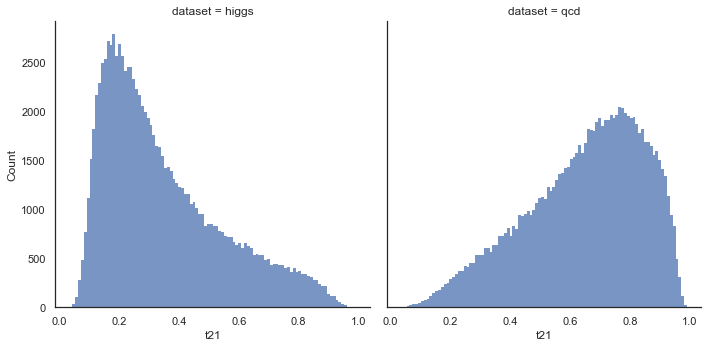

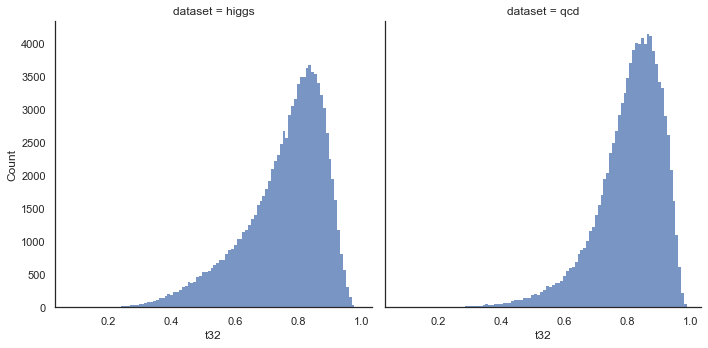

In [8]:
plot_field('t21')
plot_field('t32')

### Energy correlation

Lastly, for a positive integer $N < |J|$, the $N$th energy correlation function is defined as
$$e_N = \frac{1}{p_T^N} \sum_{i_1 < \dots < i_N \in J} \left(\prod_{a=1}^N p_T^{i_a} \right) \left(\prod_{b=1}^{N-1} \prod_{c=b+1}^N \Delta R^{i_b, i_c} \right)$$
($e_2$ and $e_3$ are given in the fields `ee2` and `ee3`.) We then define
$$D_2 = \frac{e_3}{(e_2)^3}$$
(given in the field `d2`) which is a determinant for two-prongedness.

(Note the semilog axes in the histogram for `d2`.)

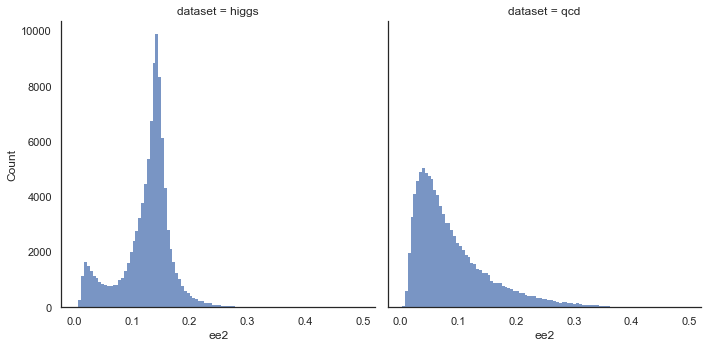

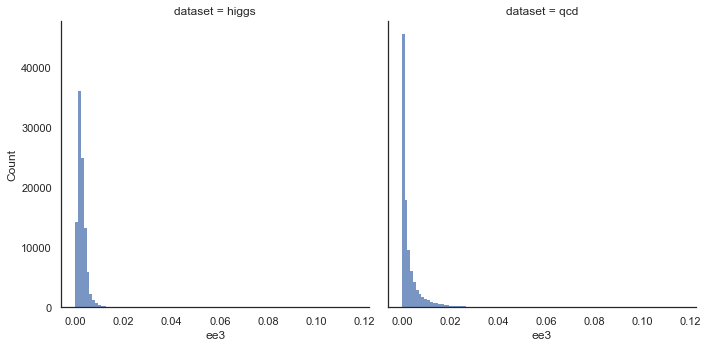

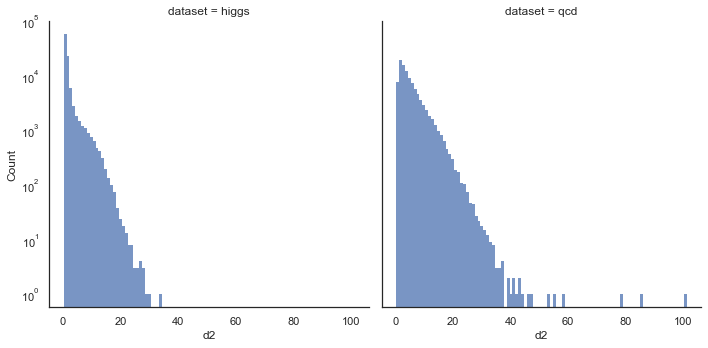

In [9]:
plot_field('ee2')
plot_field('ee3')
plot_field('d2', log=True)

## Correlations

Many of these fields are corellated with one another, particularly in the Higgs data. These correlations can be seen on a 2d histogram, a sample of which are shown below.

Of particular note is the strong correlation between radius and angularity, and the relative _lack_ of correlation between radius and $\tau_2/\tau_1$, indicating that the latter is a better normalized observable. Note also the independence of $\Delta R$ and $\eta$. This reflects the boost-invariance of $\Delta R$ and motivates our choice of coordinate system.

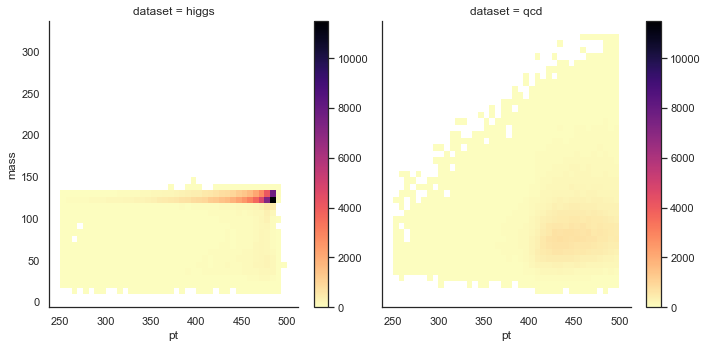

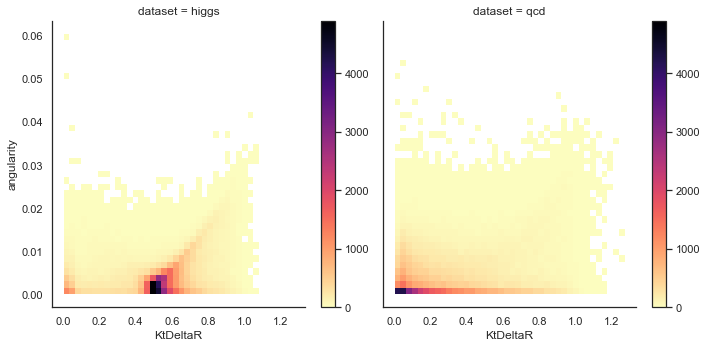

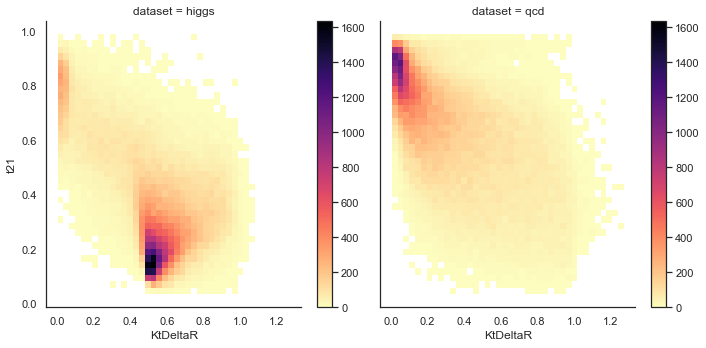

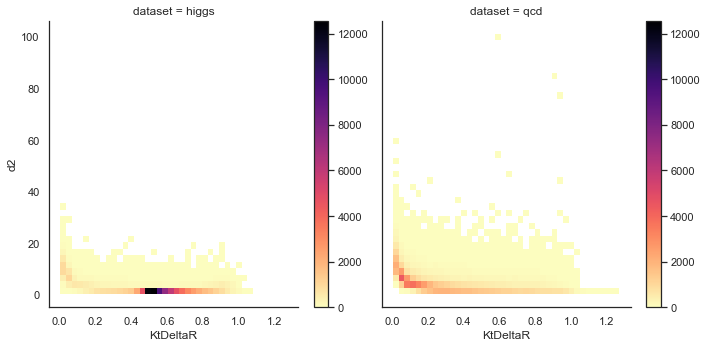

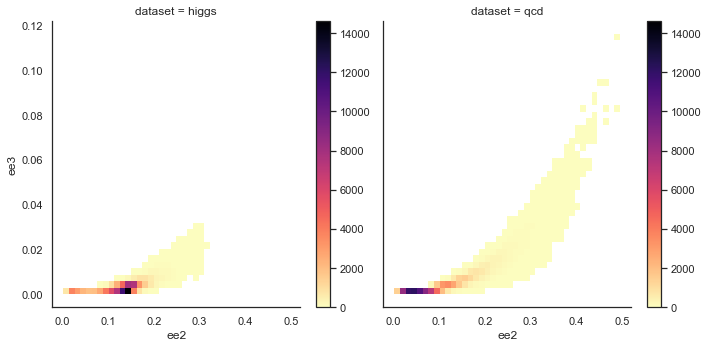

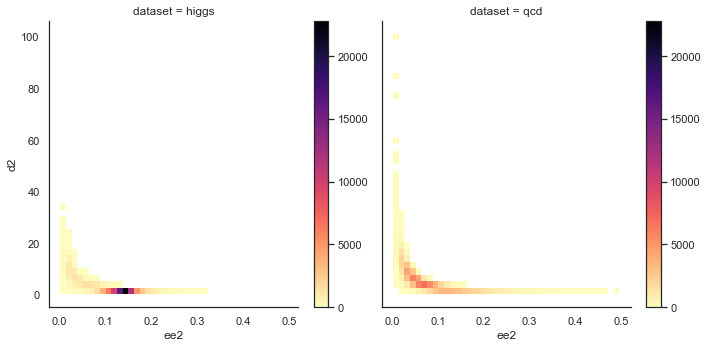

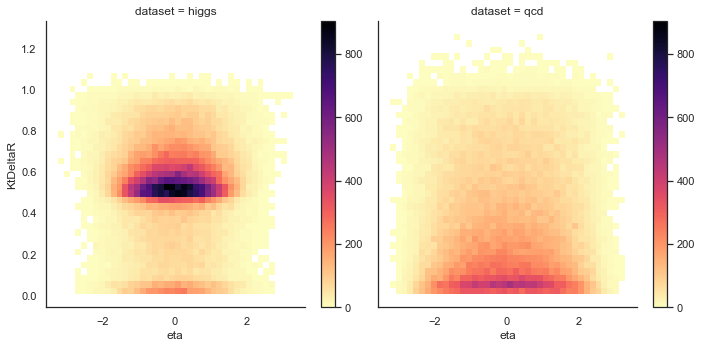

In [10]:
def plot_correlation(field1, field2):
    sns.displot(data, col='dataset', x=field1, y=field2, bins=40, cmap='magma_r', cbar=True)
    
plot_correlation('pt', 'mass')
plot_correlation('KtDeltaR', 'angularity')
plot_correlation('KtDeltaR', 't21')
plot_correlation('KtDeltaR', 'd2')
plot_correlation('ee2', 'ee3')
plot_correlation('ee2', 'd2')
plot_correlation('eta', 'KtDeltaR')

# Conclusions

The distribution of almost every field appears to differ between the QCD background and Higgs dataset (aside from `phi` which is obviously uniform) and so have a degree of discrimination power, at least in theory. In practice though, some of these will be much more useful than others. Mass is probably the most striking discriminant: Higgs jets are peaked strongly around a mass of 125 GeV, and there are no Higgs jets at all with a mass above 150 GeV, giving us a very strong selection criteria. There is also a strong peak in radii around 0.5, with most Higgs jets sitting above 0.4, whereas the QCD jets are concentrated at low radii. Of the substructure observables, `t21` and `d2` appear most promising as discriminants. In particular, a very agressive `d2` cut (discarding all events with, say, `d2 > 4`) looks like it would discard most of the background at the cost of a good amount of our signal, whereas `t21` provides a more conservative option. Angularity looks at first like a useful discriminant, but because of the correlation with jet radius discussed above it is probably redundant.

As an aside, it is notable that unlike `t21`, `t32` appears to have little discriminating power, suggesting that Higgs jets are at most two pronged. On the one hand this makes sense, given that the dominant Higgs decay is to a bottom-antibottom pair. However, the Higgs can also decay into two W bosons, each of which in turn decay into a quark-antiquark pair, so this should in theory produce a four pronged jet. The fact that this is not observed in the data, at least under visual inspection, suggests that either this decay path is too rare to show up prominently or that the splitting angle of the W to quark-antiquark decay is too small to be resolved.